In [3]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Zad 1.
Wylosuj próbkę 1000-elementową z rozkładu normalnego za pomocą metody odrzucania [link](http://staff.iiar.pwr.wroc.pl/grzegorz.mzyk/kmi/kmi03.pdf).

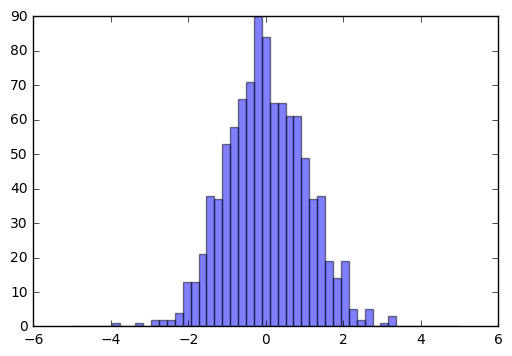

In [4]:
result = []
counter = 0
while counter < 1000:
    x, y = np.random.uniform(-5, 5, 1), np.random.uniform(0, 1, 1)
    if y < norm.pdf(x):
        result.append(x)
        counter += 1
bins = np.linspace(-5, 5, 50)
_ = plt.hist(np.array(result), bins=bins, alpha=0.5)

# Zad 2.
Narysuj gęstość rozkładu Split normal distribution (1d) z różnymi parametrami [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf).

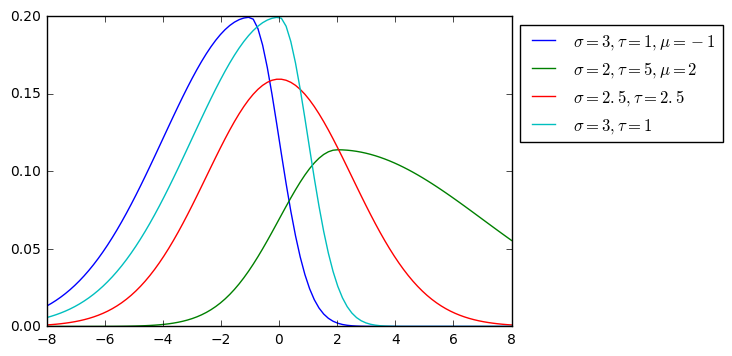

In [8]:
@np.vectorize
def split_gauss_pdf(x, mu, sigma, tau):
    c =  1 / (sigma + tau)
    if x < mu:
        scale = sigma
    else:
        scale = tau
    return 2 * c * scale * norm.pdf(x, loc=mu, scale=scale)

x = np.linspace(-8, 8, 100)

plt.plot(x, split_gauss_pdf(x, -1, 3.0, 1.0))
plt.plot(x, split_gauss_pdf(x, 2, 2, 5))
plt.plot(x, split_gauss_pdf(x, 0, 2.5, 2.5))
plt.plot(x, split_gauss_pdf(x, 0, 3.0, 1.0))
_ = plt.legend([r"$\sigma=3,\tau=1,\mu=-1$", r"$\sigma=2,\tau=5, \mu=2$", r"$\sigma=2.5,\tau=2.5$", r"$\sigma=3,\tau=1$"], 
               bbox_to_anchor=(1.0, 1), loc=2)

# Zad 3.
Wylosuj próbkę 1000-elementową z rozkładu normalnego Split normal distribution (1d) z różnymi parametrami za pomocą metody odrzucania [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf).

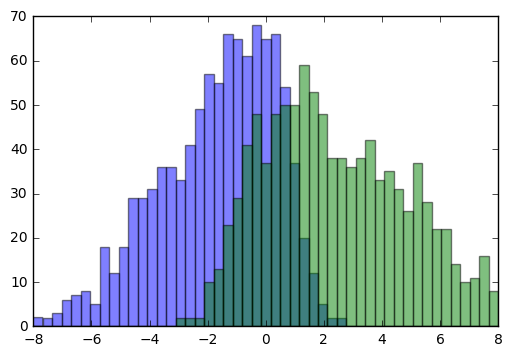

In [9]:
result = []
counter = 0
while counter < 1000:
    x, y = np.random.uniform(-8, 8, 1), np.random.uniform(0, 1, 1)
    if y < split_gauss_pdf(x, 0, 3, 1):
        result.append(x)
        counter += 1
bins = np.linspace(-8, 8, 50)
_ = plt.hist(np.array(result), bins=bins, alpha=0.5)

result = []
counter = 0
while counter < 1000:
    x, y = np.random.uniform(-8, 8, 1), np.random.uniform(0, 1, 1)
    if y < split_gauss_pdf(x, 0, 1, 5):
        result.append(x)
        counter += 1
bins = np.linspace(-8, 8, 50)
_ = plt.hist(np.array(result), bins=bins, alpha=0.5)

# Zad 4.
Narysuj wykres 3d Split normal distribution (2d) [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf).

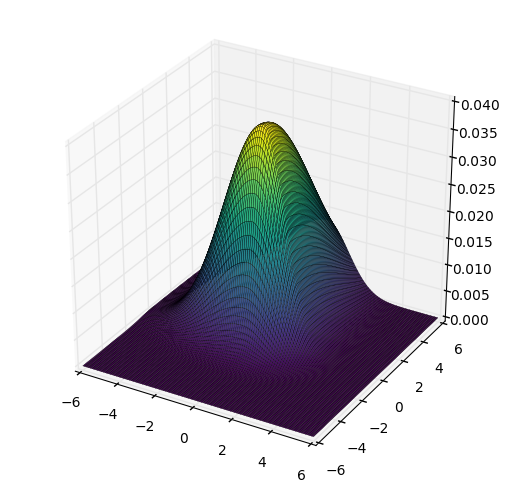

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.mlab as mlab
from matplotlib import cm

def rand_pd_matrix(size):
    A = np.random.rand(size, size)
    return np.dot(A, A.T)

def split_gauss_2d_pdf(x, y, m, W, sigma, tau):
    z = np.array([x - m[0], y - m[1]])
    return (W[0][0] * W[1][1] - W[0][1] * W[1][0]) * split_gauss_pdf(np.dot(W[:,0].T, z), 0, sigma[0], tau[0]) \
            * split_gauss_pdf(np.dot(W[:,1].T, z), 0, sigma[1], tau[1])

X = np.arange(-6, 6, 0.01)
Y = np.arange(-6, 6, 0.01)
X, Y = np.meshgrid(X, Y)
sigma = np.array([2, 1])
tau = np.array([1.2, 4])
W = np.array([[1, 0], [0, 1]])
m = np.array([0, 0])

Z = split_gauss_2d_pdf(X.flatten(), Y.flatten(), m, W, sigma, tau)
Z = Z.reshape((X.shape[0], X.shape[0]))

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
_ = ax.plot_surface(X, Y, Z, linewidth=0.2, cmap=cm.viridis)

# Zad 5.
Prosze narysować poziomicę rozkładu Split normal distribution (2d) [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf).

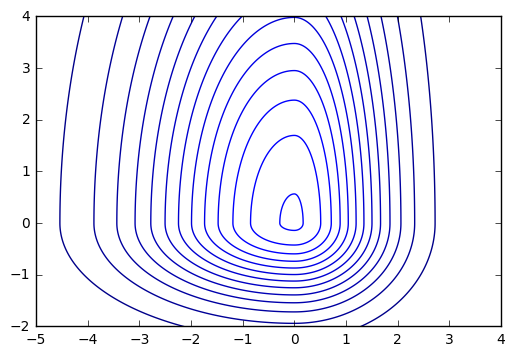

In [11]:
ax = plt.subplot()
ax.set_ylim(-2, 4)
ax.set_xlim(-5, 4)
levels = np.linspace(0.0, 0.3, 100)
_ = plt.contour(X, Y, Z, levels, origincmap=cm.viridis)

# Zad 6.
Wylosuj próbkę z dwuwymiarowego rozkładu normalnego Split normal distribution (2d). Narysuj próbkę i poziomice rozkładów [link](http://ww2.ii.uj.edu.pl/~spurek/AD_15_16/1.pdf).

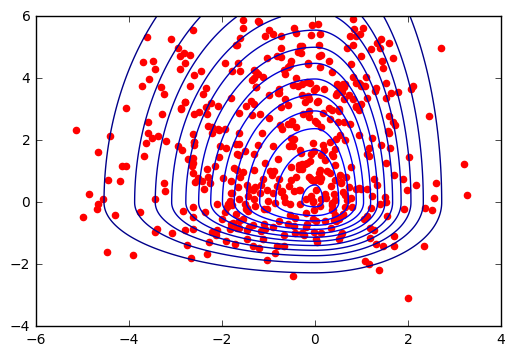

In [12]:
X = np.arange(-6, 6, 0.01)
Y = np.arange(-6, 6, 0.01)

sigma = np.array([2, 1])
tau = np.array([1.2, 4])
W = np.array([[1, 0], [0, 1]])
m = np.array([0, 0])

result = []
counter = 0
while counter < 500:
    x, y = np.random.uniform(-6, 6, 2), np.random.uniform(0, 1, 1)
    if y < split_gauss_2d_pdf(x[0], x[1], m, W, sigma, tau):
        result.append(x)
        counter += 1
result = np.array(result)
ax = plt.subplot()
ax.set_ylim(-4, 6)
ax.set_xlim(-6, 4)
levels = np.linspace(0.0, 0.3, 100)
plt.contour(X, Y, Z, levels, origincmap=cm.viridis)
_ = plt.scatter(result[:, 0], result[:, 1], color='r')

# Zad 7.
Wylosuj próbkę z 2 wymiarowego rozkładu normalnego metodą Gibbs Sampler [link](https://darrenjw.wordpress.com/2011/07/16/gibbs-sampler-in-various-languages-revisited/) [link](http://www.jarad.me/courses/stat544/slides/Ch11/Ch11b.pdf).

In [ ]:
N = 5000
thin = 100

rho = 0.5
cov = [[1, rho], [rho, 1]]

theta_1 = 0
theta_2 = 0
x = [] 
y = []
for i in range(N):
    for j in range(thin):
        theta_1 = np.random.normal(loc=rho*theta_2, scale=1-rho*rho, size=1)
        theta_2 = np.random.normal(loc=rho*theta_1, scale=1-rho*rho, size=1)
    x.append(theta_1), y.append(theta_2)


_ = plt.scatter(x, y)

# Zad 8.
Wylosuj próbkę z 10 wymiarowego rozkładu normalnego metodą Gibbs Sampler.

In [ ]:
# not implemented

# Zad 9.
Napisz program znajdujący minimum i maksimum funkcji metodą gradientową (można użyć wbudowanych narzędzi).

$$f(x_1, x_2)=100 \cdot (x_2 - x_1 \cdot x_1)^2 + (1 - x_1)^2 \\
f'_{x_1}=-400 * x_1 * (x_2 - x_1 * x_1) - 2 * (1 - x_1) \\
f'_{x_2}=200 * (x_2 - x_1 * x_1)$$ 

In [ ]:
from scipy.optimize import minimize

def f(x):
    return 100 * (x[1] - x[0] * x[0]) ** 2 + (1 - x[0]) ** 2

def jac_f(x):
    return np.array([-400 * x[0] * (x[1] - x[0] * x[0]) - 2 * (1 - x[0]), 200 * (x[1] - x[0] * x[0])])

minimize(f, [1, 2], jac=jac_f)